# Flu Shot Learning: Predicting H1N1 and Seasonal Flu Vaccines

## Importing requirements

In [526]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Encoding
from sklearn.preprocessing import MinMaxScaler , LabelEncoder

#Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Models
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier


## Loading data

In [527]:
#Opening both datasets with pandas
features = pd.read_csv("training_set_features.csv")
labels = pd.read_csv("training_set_labels.csv")

In [528]:
#Combining the labels with the features
data = pd.merge(features, labels)

In [529]:
data.head(15)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov,0,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo,0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp,1,1
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Own,Employed,bhuqouqj,"MSA, Not Principle City",1.0,0.0,xicduogh,ccgxvspp,0,0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,0


In [530]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

We can see the data types available for this dataset are 25 instances of floats, 1 integer and 12 objects.

In [531]:
data.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [532]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
respondent_id,26707.0,13353.000000,7709.791156,0.0,6676.5,13353.0,20029.5,26706.0
h1n1_concern,26615.0,1.618486,0.910311,0.0,1.0,2.0,2.0,3.0
h1n1_knowledge,26591.0,1.262532,0.618149,0.0,1.0,1.0,2.0,2.0
behavioral_antiviral_meds,26636.0,0.048844,0.215545,0.0,0.0,0.0,0.0,1.0
behavioral_avoidance,26499.0,0.725612,0.446214,0.0,0.0,1.0,1.0,1.0
behavioral_face_mask,26688.0,0.068982,0.253429,0.0,0.0,0.0,0.0,1.0
behavioral_wash_hands,26665.0,0.825614,0.379448,0.0,1.0,1.0,1.0,1.0
behavioral_large_gatherings,26620.0,0.358640,0.479610,0.0,0.0,0.0,1.0,1.0
behavioral_outside_home,26625.0,0.337315,0.472802,0.0,0.0,0.0,1.0,1.0
behavioral_touch_face,26579.0,0.677264,0.467531,0.0,0.0,1.0,1.0,1.0


In [533]:
data.shape

(26707, 38)

In [534]:
profile = ProfileReport(data, title="H1N1 and Seasonal Flu Vaccines")

In [535]:
#profile

In [536]:
features = data.iloc[:, :-2]
features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [537]:
labels = data.iloc[:, -2:]
labels.head()

,h1n1_vaccine,seasonal_vaccine
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


### Checking Duplicates 

In [538]:
features.duplicated().sum()

0

There are no duplicates in this dataset

### Checking missing data

In [539]:
features.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [540]:
features.isnull().sum()/len(data)*100

respondent_id                   0.000000
h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race            

We can see that nearly all of the data has over 50% of missing data with employment occupation being the highest with 75%

Our dataset is quite imbalanced so we can impute this missing data to balance it out

### Imputation of the missing data

In [541]:
#Assigning the numerical data to a variable
numeric_data = features._get_numeric_data()

In [542]:
#Imputing Numerical Data with the median
for column in numeric_data:
    features[column].fillna(features[column].median(), inplace= True)

In [543]:
features.isnull().sum()/len(data)*100


respondent_id                   0.000000
h1n1_concern                    0.000000
h1n1_knowledge                  0.000000
behavioral_antiviral_meds       0.000000
behavioral_avoidance            0.000000
behavioral_face_mask            0.000000
behavioral_wash_hands           0.000000
behavioral_large_gatherings     0.000000
behavioral_outside_home         0.000000
behavioral_touch_face           0.000000
doctor_recc_h1n1                0.000000
doctor_recc_seasonal            0.000000
chronic_med_condition           0.000000
child_under_6_months            0.000000
health_worker                   0.000000
health_insurance                0.000000
opinion_h1n1_vacc_effective     0.000000
opinion_h1n1_risk               0.000000
opinion_h1n1_sick_from_vacc     0.000000
opinion_seas_vacc_effective     0.000000
opinion_seas_risk               0.000000
opinion_seas_sick_from_vacc     0.000000
age_group                       0.000000
education                       5.268282
race            

We've now replaced the numerical data with the median of each column

In [544]:
#Assigned the columns with categorical data to a variable
categorical_data = ['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region','census_msa'
               ,'employment_industry','employment_occupation']

In [545]:
#Imputing the categorical data with the mode of each column
for column in categorical_data:
    features[column].fillna(features[column].mode()[0], inplace=True)

In [546]:
features.isnull().sum()/len(data)*100

respondent_id                  0.0
h1n1_concern                   0.0
h1n1_knowledge                 0.0
behavioral_antiviral_meds      0.0
behavioral_avoidance           0.0
behavioral_face_mask           0.0
behavioral_wash_hands          0.0
behavioral_large_gatherings    0.0
behavioral_outside_home        0.0
behavioral_touch_face          0.0
doctor_recc_h1n1               0.0
doctor_recc_seasonal           0.0
chronic_med_condition          0.0
child_under_6_months           0.0
health_worker                  0.0
health_insurance               0.0
opinion_h1n1_vacc_effective    0.0
opinion_h1n1_risk              0.0
opinion_h1n1_sick_from_vacc    0.0
opinion_seas_vacc_effective    0.0
opinion_seas_risk              0.0
opinion_seas_sick_from_vacc    0.0
age_group                      0.0
education                      0.0
race                           0.0
sex                            0.0
income_poverty                 0.0
marital_status                 0.0
rent_or_own         

In [547]:
def balance(features):
    from collections import Counter
    from numpy import log
    
    n = len(data)
    classes = [(clas,float(count)) for clas,count in Counter(data).items()]
    k = len(classes)
    
    H = -sum([ (count/n) * log((count/n)) for clas,count in classes]) #shannon entropy
    return H/log(k)

### Seperating categorical and numerical data

In [548]:
cat=[]
num=[]
for i in features.columns:
    if features[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)

In [549]:
print(cat)

['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation']


In [550]:
print(num)

['respondent_id', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']


### Checking if the dataset is balanced

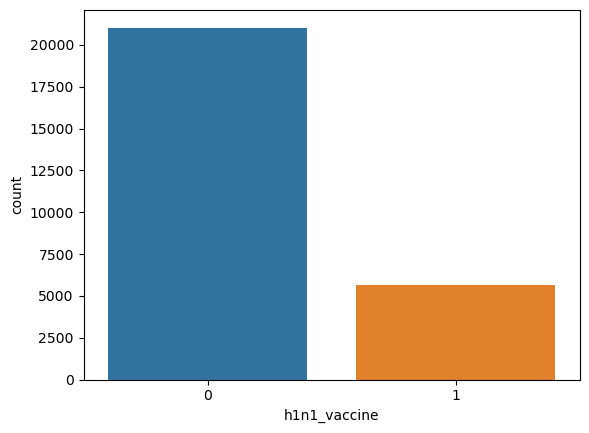

In [551]:
sns.countplot(x="h1n1_vaccine", data=labels);

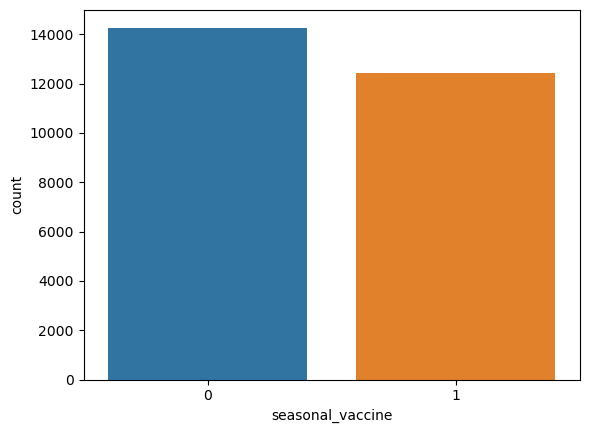

In [552]:
sns.countplot(x="seasonal_vaccine", data=labels);

### Dealing with outliers

C:\Users\danie\AppData\Local\Temp\ipykernel_448\1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<AxesSubplot: >

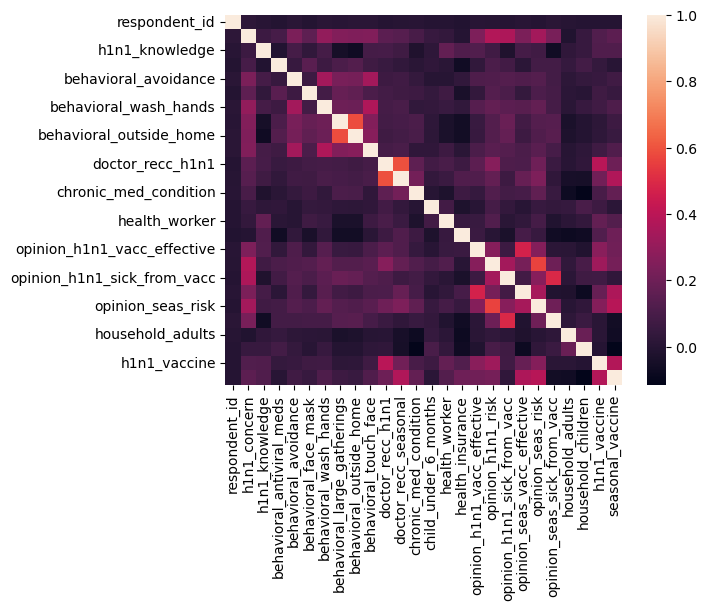

In [553]:
sns.heatmap(data.corr())

In [554]:
#We can remove respondent_id since it is deemed redundant
features.drop(['respondent_id'], axis = 1, inplace=True)

In [555]:
def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return np.array(outliers)  

<AxesSubplot: >

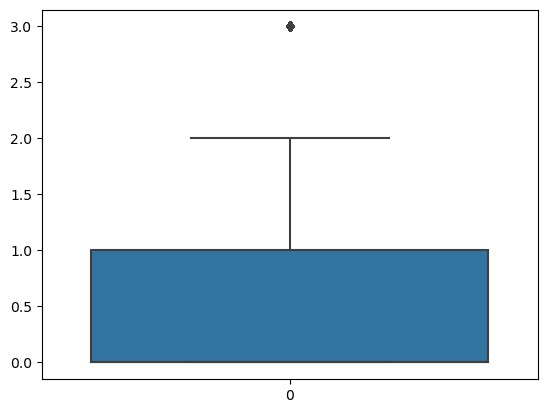

In [556]:
sns.boxplot(features.household_children)

<AxesSubplot: >

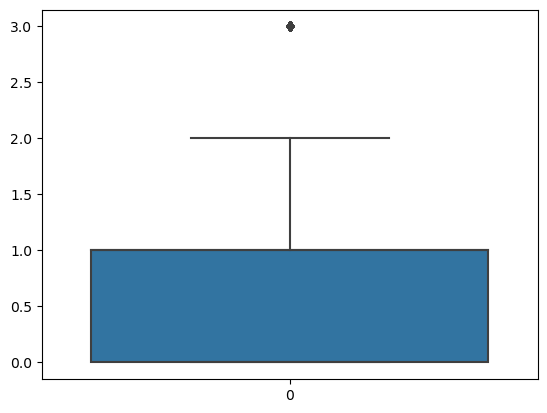

In [557]:
sns.boxplot(features.household_adults)

### Encoding

In [558]:
enc = LabelEncoder()
features[['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region','census_msa'
               ,'employment_industry','employment_occupation']] = data[['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region','census_msa'
               ,'employment_industry','employment_occupation']].apply(enc.fit_transform)

features[['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region','census_msa'
               ,'employment_industry','employment_occupation']]

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,3,1,3,0,2,1,0,1,8,2,21,23
1,1,0,3,1,2,1,1,0,1,0,12,19
2,0,2,3,1,0,1,0,0,9,0,14,21
3,4,0,3,0,2,1,1,1,5,1,21,23
4,2,3,3,0,0,0,0,0,9,0,18,5
...,...,...,...,...,...,...,...,...,...,...,...,...
26702,4,3,3,0,0,1,0,1,9,2,21,23
26703,0,2,3,1,0,1,1,0,6,1,4,2
26704,3,3,3,0,3,1,0,3,6,0,21,23
26705,0,3,1,0,0,0,1,0,5,2,4,6


### Plotting Standard Deviation

In [559]:
features.std()

h1n1_concern                   0.909016
h1n1_knowledge                 0.617047
behavioral_antiviral_meds      0.215273
behavioral_avoidance           0.445127
behavioral_face_mask           0.253345
behavioral_wash_hands          0.379213
behavioral_large_gatherings    0.479264
behavioral_outside_home        0.472444
behavioral_touch_face          0.466942
doctor_recc_h1n1               0.401866
doctor_recc_seasonal           0.459592
chronic_med_condition          0.445490
child_under_6_months           0.271382
health_worker                  0.311077
health_insurance               0.246533
opinion_h1n1_vacc_effective    1.000195
opinion_h1n1_risk              1.276825
opinion_h1n1_sick_from_vacc    1.353339
opinion_seas_vacc_effective    1.077131
opinion_seas_risk              1.375216
opinion_seas_sick_from_vacc    1.319585
age_group                      1.457320
education                      1.186442
race                           0.923226
sex                            0.491136


In [560]:
std = labels['h1n1_vaccine'].std()
avg = labels['h1n1_vaccine'].std()

In [561]:
avg + std #1std above the mean

0.8181035868580915

In [562]:
avg-std #1std below the mean

0.0

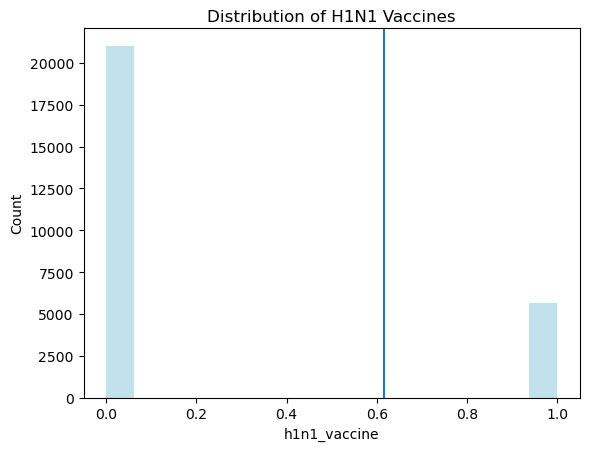

In [563]:
sns.histplot(x = labels['h1n1_vaccine'], color = 'lightblue', edgecolor = None )
plt.title("Distribution of H1N1 Vaccines", pad=5)

plt.axvline(x = 0.616261209611533, ymin = 0, ymax = labels["h1n1_vaccine"].max())

Standard distribution of H1N1 vaccines using a quantile range

### Visualisation

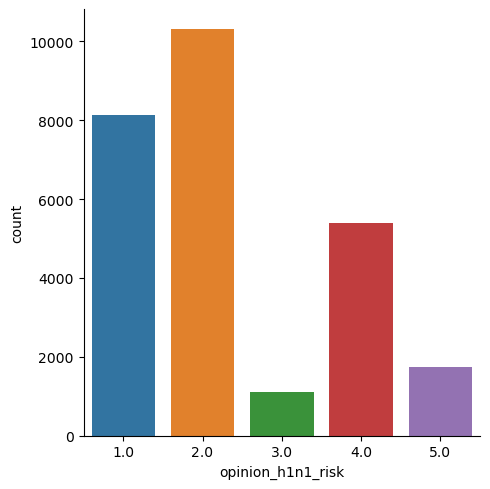

In [564]:
sns.catplot(data = features, x = "opinion_h1n1_risk", kind = "count")

Most people are not worried about the H1N1 vaccine

## Feature Scaling

In [587]:
X = features
y = labels

## Feature Selection

## Linear SVC

In [565]:
#classifier = svm.SVC(kernel='linear', C = 1.0)

In [592]:
X

array([[-8.15766932,  0.08594517, -3.18536622],
       [ 1.1638633 , -3.51283676,  3.84212684],
       [-1.58838439, -3.48260179, -4.21583576],
       ...,
       [-8.21886422,  0.17308878, -1.07233172],
       [16.07440361, -0.12556947, -0.32409869],
       [-8.09977078,  0.11028511, -2.14970321]])

In [593]:
y

,h1n1_vaccine,seasonal_vaccine
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
26702,0,0
26703,0,0
26704,0,1
26705,0,0


In [594]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 42)

In [595]:
from sklearn.naive_bayes import GaussianNB
from skmultilearn.problem_transform import BinaryRelevance

model = BinaryRelevance(GaussianNB())

model.fit(x_train, y_train)

y_prediction_nb = model.predict(x_test)



In [601]:
accuracy_nb = accuracy_score(y_test, y_prediction)
accuracy_nb

ValueError: Found input variables with inconsistent numbers of samples: [5342, 8013]

## Linear SVC using Multi Output Classifier

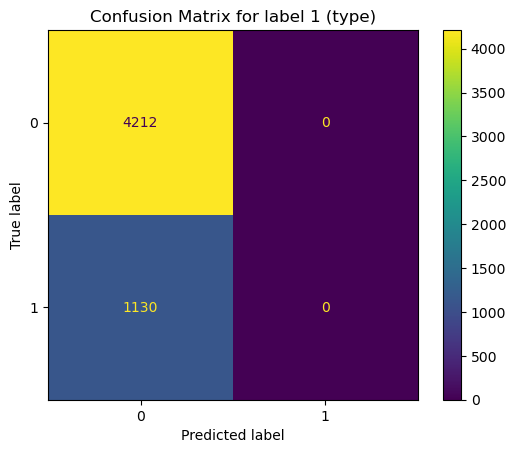

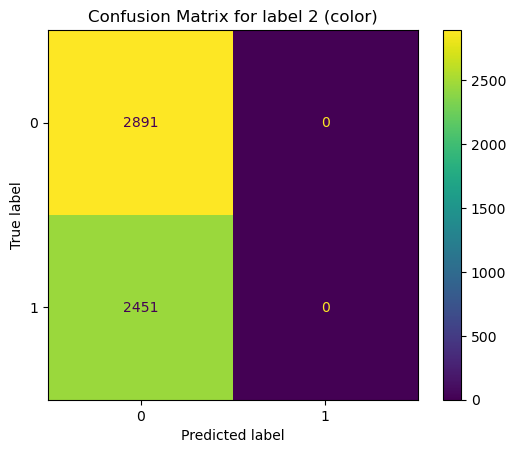

In [597]:

from sklearn.datasets import make_blobs
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay

# Create the SVM
svm = LinearSVC(random_state=42)

# Make it an Multilabel classifier
multilabel_classifier = MultiOutputClassifier(svm, n_jobs=-1)

# Fit the data to the Multilabel classifier
multilabel_classifier = multilabel_classifier.fit(x_train, y_train)

# Get predictions for test data
y_test_pred = multilabel_classifier.predict(x_test)

# Generate multiclass confusion matrices
matrices = multilabel_confusion_matrix(y_test, y_test_pred)

# Plotting matrices: code
cmd = ConfusionMatrixDisplay(matrices[0], display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix for label 1 (type)')
plt.show()
cmd = ConfusionMatrixDisplay(matrices[1], display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix for label 2 (color)')
plt.show()

In [598]:
accuracy_svc = accuracy_score(y_test, y_test_pred)
accuracy_svc

0.502620741295395

## Random Forest 

In [599]:
random_forest = RandomForestClassifier()

In [600]:
random_forest.fit(x_train, y_train)

y_prediction_rf = random_forest.predict(x_test)

accuracy_rf = accuracy_score(y_test, y_prediction_rf)
accuracy_rf

0.5488581055784351

We use the support vector classicier with a linear kernel